<h1 align=center> Tarea 9: Clustering

 </h1>

Integrantes:
- Axel Mondaca
- Sebastián Hernández

In [4]:
%pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [6]:
df = pd.read_csv('loans_Tarea9.csv').dropna()
df
X = df
X

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [7]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'category']).columns.tolist()

preproc = ColumnTransformer(
    [("num", StandardScaler(), numerical),
     ("cat", OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), categorical)]
)
X = preproc.fit_transform(X)

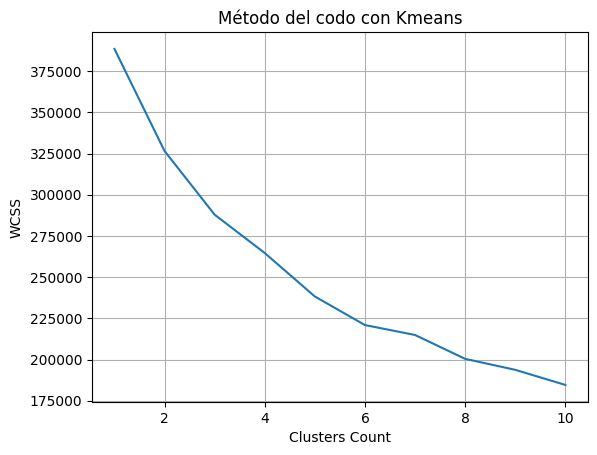

In [8]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=254)
    etiquetas = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)
    
plt.Figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.xlabel('Clusters Count')
plt.ylabel('WCSS')
plt.title('Método del codo con Kmeans')
plt.grid()

# 1. Clustering sin reducción

In [9]:
#K-means
k = 4
kmeans = KMeans(n_clusters=k, random_state=254)
kmeans_etiquetas = kmeans.fit_predict(X)

In [10]:
#HDBScan
import hdbscan
hdbscan_clust = hdbscan.HDBSCAN(min_cluster_size=k)
hdbscan_etiquetas = hdbscan_clust.fit_predict(X)

C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Reducción

In [11]:
#t-SNE
tsne = TSNE(n_components=2, random_state=254).fit_transform(X)

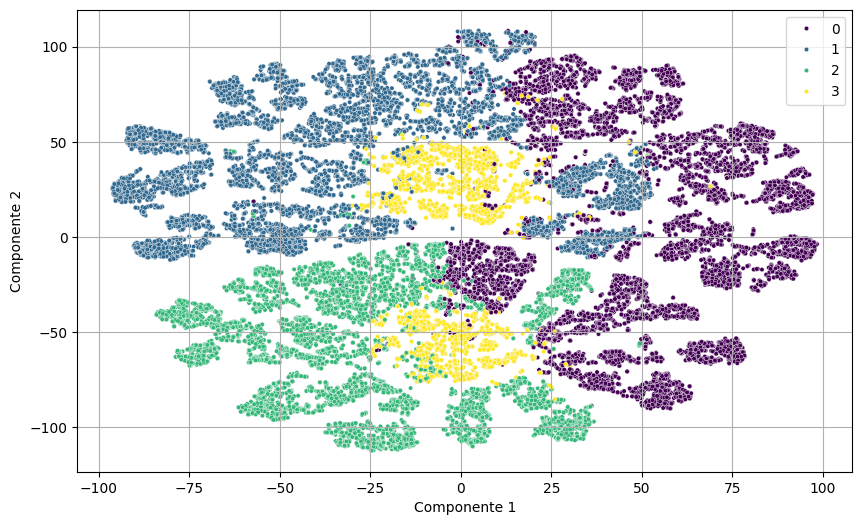

In [12]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_etiquetas, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

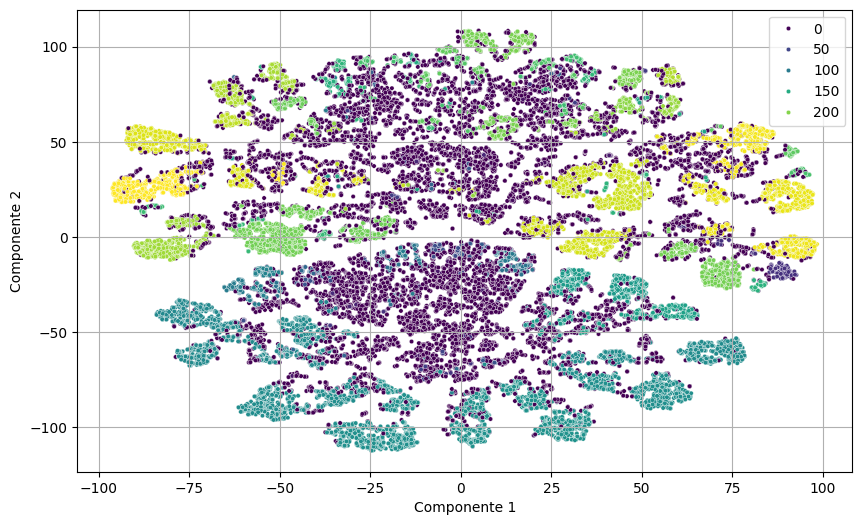

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_etiquetas, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

La técnica que genera agrupamientos más claros basándonos solamente en la visualización 2D es 

#  2. Clustering, con reducción de dimensionalidad

In [14]:
#PCA
pca = PCA(n_components=2, random_state=254)
X_pca = pca.fit_transform(X)

In [15]:
# t-SNE
tsne_reducir = TSNE(n_components=2, random_state=254).fit_transform(X) 

In [17]:
kmeans_reducido_tsne = KMeans(n_clusters=k, random_state=254)
kmeans_reducido_etiquetas_tsne = kmeans_reducido_tsne.fit_predict(tsne_reducir)

kmeans_reducido_PCA = KMeans(n_clusters=k, random_state=254)
kmeans_reducido_etiquetas_PCA = kmeans_reducido_PCA.fit_predict(X_pca)

In [21]:
hdbscan_clust_reducido_tsne = hdbscan.HDBSCAN(min_cluster_size=k)
hdbscan_reducido_etiquetas_tsne = hdbscan_clust_reducido_tsne.fit_predict(tsne_reducir)

hdbscan_clust_reducido_PCA = hdbscan.HDBSCAN(min_cluster_size=k)
hdbscan_reducido_etiquetas_PCA = hdbscan_clust_reducido_PCA.fit_predict(X_pca)

C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Visualización: Clustering con reducción de dimensionalidad PCA

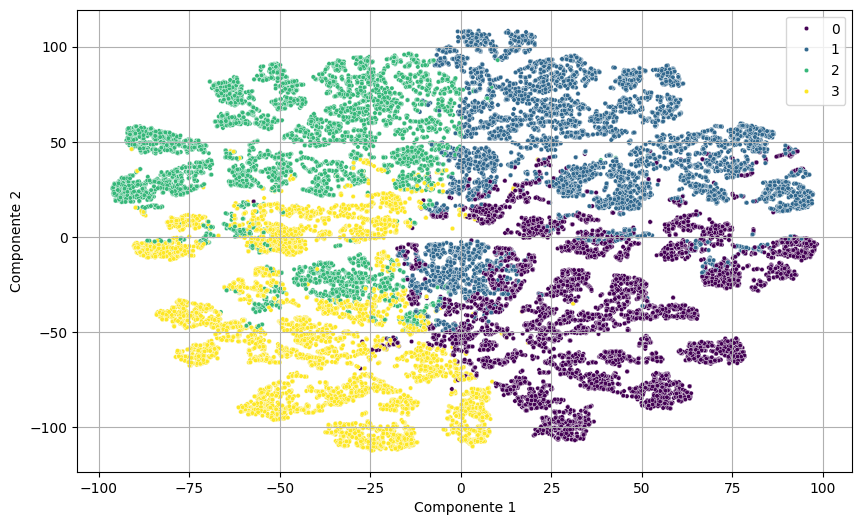

In [19]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_reducido_etiquetas_PCA, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_reducido_etiquetas_PCA, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

NameError: name 'hdbscan_reducido_etiquetas_PCA' is not defined

<Figure size 1000x600 with 0 Axes>

### Visualización: Clustering con reducción de dimensionalidad t-SNE

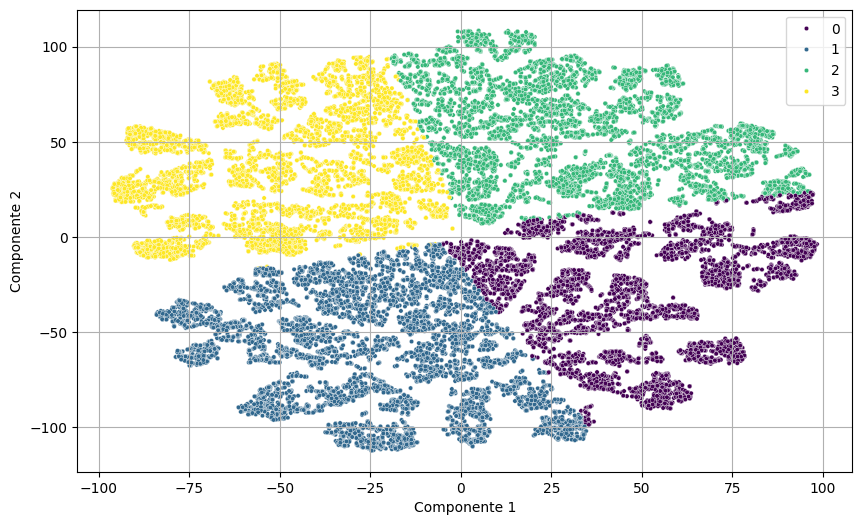

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_reducido_etiquetas_tsne, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

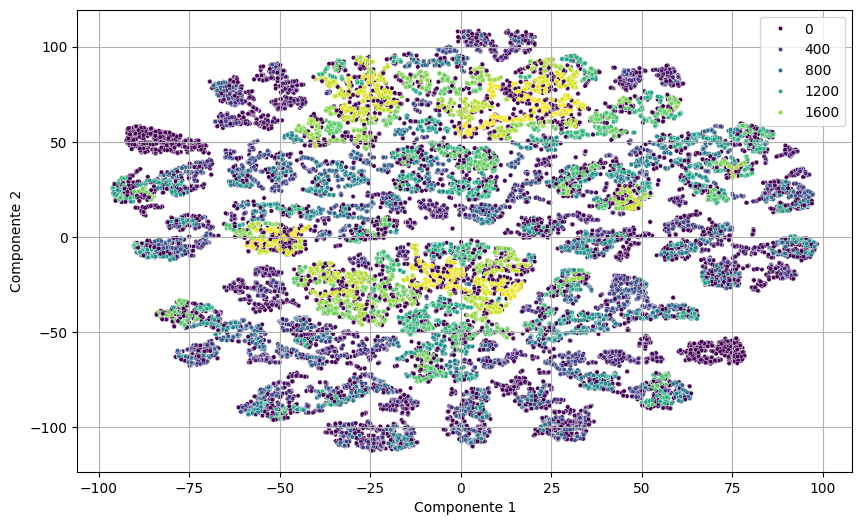

In [22]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_reducido_etiquetas_tsne, palette='viridis', s=10)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.grid()
plt.show()

In [ ]:
silhouette_score(X, kmeans_etiquetas) #0.16399832875521408

0.16399832875521408

In [30]:
silhouette_score(X, kmeans_reducido_etiquetas_PCA) #0.13793308942143254

0.13793308942143254

In [29]:
silhouette_score(X, kmeans_reducido_etiquetas_tsne) #0.13699909898355742


0.13699909898355742

In [ ]:

hdbscan_clust_visible = hdbscan.HDBSCAN(min_cluster_size=k)
hdbscan_etiquetas_visible = hdbscan_clust_visible.fit_predict(X[:500])

C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


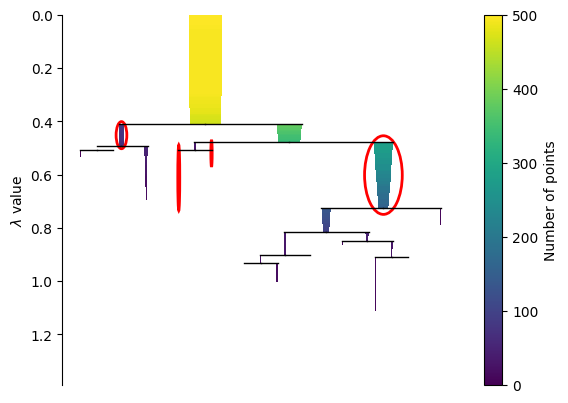

In [ ]:
hdbscan_clust_visible.condensed_tree_.plot(select_clusters=True)
plt.show()

# 3. Pseudo-labeling

In [ ]:
df = pd.read_csv('customers_Tarea8.csv')
df
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Year"] = df["Dt_Customer"].dt.year
df["Month"] = df["Dt_Customer"].dt.month
df["Day"] = df["Dt_Customer"].dt.day
df = df.drop(columns=["Dt_Customer"])
X = df.drop(axis=1, columns=["Response"])
